## Analyzing Open University Learning Analytics Dataset 

### Problem Statement 
## SOME INSIGHTS FROM THE DATA SETS

Based on the given data of students enrolled in various courses identify the student who is at-risk so that suitable interventions can be taken to help students succeed. 

***About Dataset ------- Part-1 : Reading Data***

- Open University Learning Analytics Dataset (OULAD) contains data about courses, students and their interactions with Virtual Learning Environment (VLE) for seven selected courses (called modules). Presentations of courses start in February and October - they are marked by "B" and "J" respectively. The dataset consists of tables connected using unique identifiers. Dataset is stored in several csv files.  


Number of Instances: 
    - students in courses : 32953
    - course-presentations: 22
    - VLE pages           : 6364
    - VLE log entries     : 10655280
    - registration entries: 32953
    - assessments         : 206
    - assessment entries  : 173912


In [1]:
#importing Libraries
import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#bokeh
from bokeh.io import output_notebook, show
output_notebook()
from bokeh.plotting import figure, output_file, show, ColumnDataSource

Loading BokehJS ...

In [2]:
# Reading Data
student_info = pd.read_csv('../studentInfo.csv')
student_assessment = pd.read_csv('../studentAssessment.csv')
student_registration = pd.read_csv('../studentRegistration.csv')
student_vle = pd.read_csv('../studentVle.csv')
assessments = pd.read_csv('../assessments.csv')
courses = pd.read_csv('../courses.csv')
vle = pd.read_csv('../vle.csv')

#check for the data
print('----- Rows -----')
print('Courses     : ',courses.shape[0])
print('Assessments : ',assessments.shape[0])
print('vle(Virtual Learning Environment) : ',vle.shape[0])
print('Student Info         : ',student_info.shape[0])
print('student Assessment   : ',student_assessment.shape[0])
print('student Registration : ',student_registration.shape[0])
print('student Vle          : ',student_vle.shape[0])

----- Rows -----
Courses     :  22
Assessments :  206
vle(Virtual Learning Environment) :  6364
Student Info         :  32593
student Assessment   :  173912
student Registration :  32593
student Vle          :  10655280


In [3]:
### Lets see what is there in very file
# ---- For COURSES
#courses.head()
courses

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240
5,BBB,2014B,234
6,CCC,2014J,269
7,CCC,2014B,241
8,DDD,2013J,261
9,DDD,2014J,262


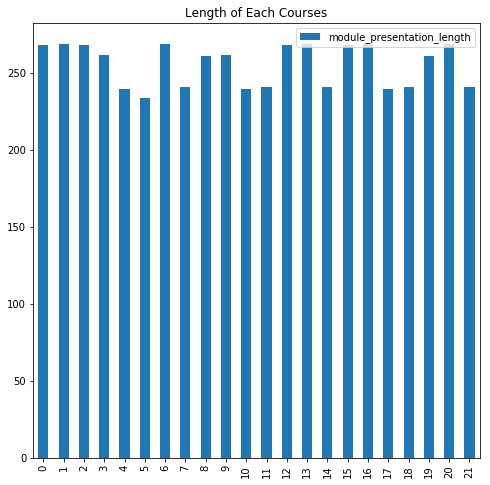

In [4]:
courses.plot(kind='bar', title='Length of Each Courses', figsize=(8,8))
plt.show()

***code_module*** : code name of the module, which serves as the identifier

***code_presentation*** : code name of the presentation. It consists of the year and “B” for the presentation starting in February and “J” for the presentation starting in October

***module_presentation_length*** :  length of the module-presentation in days

In [5]:
# ---- For Assessments
assessments.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


***code_module*** : identification code of the module,to which the assessment belongs.

***code_presentation*** : identification code of the presentation, to which the assessment belongs.

***id_assessment*** : identification number of the assessment

***assessment_type*** : type of assessment

***date*** : information about the final submission date of the assessment calculated as the number of days since the start of the module-presentation. The starting date of the presentation has number 0 (zero)

***weight*** : weight of the assessment in %. Typically, Exams are treated separately and have the weight 100%; the sum of all other assessments is 100%

In [6]:
# ---- For VLE - Virtual Learning Environment
vle.head()

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN


***id_site*** : an identification number of the material

***code_module*** : an identification code for module

***code_presentation*** : the identification code of presentation

***activity_type*** : the role associated with the module material

***week_from*** : the week from which the material is planned to be used

***week_to*** : week until which the material is planned to be used

In [7]:
vle.shape

(6364, 6)

In [8]:
# ---- Students Info
student_info.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


***code_module*** : An identification code for a module on which the student is registered.

***code_presentation*** : The identification code of the presentation during which the student is registered on the module.

***id_student*** : A unique identification number for the student.

***gender*** : The student’s gender.

***region*** : Identifies the geographic region, where the student lived while taking the module-presentation.

***highest_education*** : Highest student education level on entry to the module presentation.

***imd_band*** : Specifies the Index of Multiple Depravation band of the place where the student lived during the module-presentation.

***age_band*** : Band of the student’s age.

***num_of_prev_attempts*** : The number times the student has attempted this module.

***studied_credits*** : The total number of credits for the modules the student is currently studying.

***disability*** : Indicates whether the student has declared a disability

***final_result*** : student’s final result in the module-presentation

In [9]:

# ---- For Student assessments ----- total 173912
student_assessment.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


***id_assessment*** : the identification number of the assessment.

***id_student*** : a unique identification number for the student.

***date_submitted*** : the date of student submission, measured as the number of days since the start of the module presentation.

***is_banked*** : a status flag indicating that the assessment result has been transferred from a previous presentation.
   
***score*** : the student’s score in this assessment. The range is from 0 to 100. The score lower than 40 is interpreted as Fail. The marks are in the range from 0 to 100.

In [10]:
# ---- For Student Registrations #--- number of rows - 32593
student_registration.head()
student_registration.date_unregistration.isnull().sum()
print(student_registration.shape)
student_registration.head()


(32593, 5)


,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


***code_module*** : an identification code for a module

***code_presentation*** : The identification code of the presentation

***id_student*** : a unique identification number for the student

***date_registration (Days)*** : The date of student’s registration on the module presentation, this is the number of days measured relative to the start of the module-presentation 
(e.g. the negative value -30 means that the student registered to module presentation 30 days before it started)
   
***date_unregistration (Days)*** : date of student unregistration from the module presentation, this is the number of days measured relative to the start of the module-presentation. Students, who completed the course have this field empty. Students who unregistered have Withdrawal as the value of the final_result column in the studentInfo.csv file

In [11]:
# ---- student_vle
student_vle.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


***code_module***: an identification code for a module

***code_presentation*** : the identification code of the module presentation

***id_student*** : a unique identification number for the student

***id_site*** : an identification number for the VLE material

***date (Days)*** : the date of student’s interaction with the material measured as the number of days since the start of the module-presentation

***sum_click*** : the number of times a student interacts with the material in that day

In [12]:
#get number of students registered for each course in every year
students_enrolled=student_registration.groupby(['code_module','code_presentation']).size().reset_index(name='Students_enrolled')


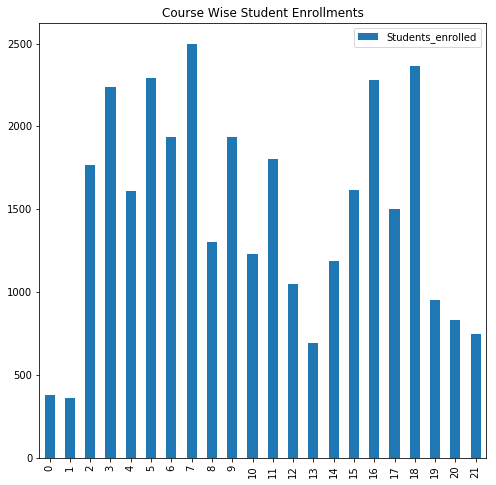

In [13]:
students_enrolled.plot(kind='bar', title='Course Wise Student Enrollments', figsize=(8,8))
plt.show()

In [14]:
#check total assessments in each courses
assesments_stats=assessments.groupby(['code_module','code_presentation']).size().reset_index(name='Total_assessments')
assesments_stats


,code_module,code_presentation,Total_assessments
0,AAA,2013J,6
1,AAA,2014J,6
2,BBB,2013B,12
3,BBB,2013J,12
4,BBB,2014B,12
5,BBB,2014J,6
6,CCC,2014B,10
7,CCC,2014J,10
8,DDD,2013B,14
9,DDD,2013J,7


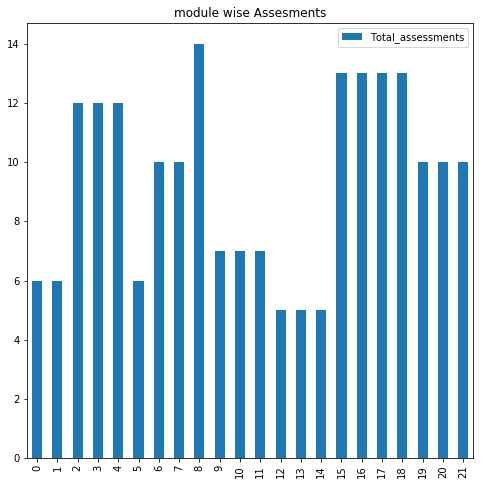

In [15]:
assesments_stats.plot(kind='bar', title='module wise Assesments', figsize=(8,8))
plt.show()

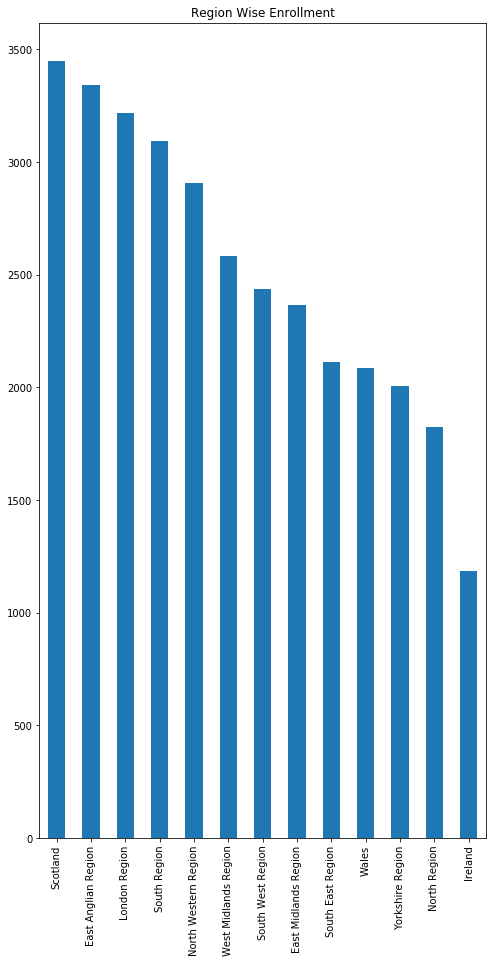

In [16]:
enrolled_by_region=student_info['region'].value_counts()
enrolled_by_region.plot(kind='bar', title='Region Wise Enrollment', figsize=(8,15))
plt.show()

### Initial Assumptions --- Path Forward

As we have to predict the at risk student, there are many features that might contribute to a student success, to extract those features we perform some Exploratory Data Analysis (EDA). 

Some initial assumptions can be made from the real world scenarios in order to move forward.

-> Students success is determined by the assessments i.e if he/she is submitting the assignments on time and how much score is obtained in every assessment by calculating a weighted average of those data we can determine whether or not a student is at risk.

->  Do we need to build a model for each course ???

-> need to check max courses a student can take in one semester

->get to know more about the students who withdraw from their courses

***A) Analyzing Student_info Data*** 

In [17]:
#get results of students
print('----------- Student Final Results -------------')
print(student_info['final_result'].value_counts())

#get student past credits
print('----------- Student previous credits -------------')
#print(student_info['studied_credits'].value_counts())

#get student with max and min credits
print('----------- Student Previous Credits Details-------------')
print('Minimum_Credits : ',str(student_info['studied_credits'].min()))
print('Maximum_Credits: ',str(student_info['studied_credits'].max()))
print('Zero credits : ',student_info[student_info['studied_credits'] == 0].size)

----------- Student Final Results -------------
Pass           12361
Withdrawn      10156
Fail            7052
Distinction     3024
Name: final_result, dtype: int64
----------- Student previous credits -------------
----------- Student Previous Credits Details-------------
Minimum_Credits :  30
Maximum_Credits:  655
Zero credits :  0


***Insights from Above Data***
- max credits for a student are 655 and minimum value is 30 credits
- most of the students in the dataset are having 60 credits
- There are no students with zero credits

In [18]:
#get student past credits for passing students
passing_student_info = student_info[student_info['final_result']=='Pass']
print('----------- Student previous credits -- PASS-------------')
#print(passing_student_info['studied_credits'].value_counts())
print('Minimum_Credits(PASS)',passing_student_info['studied_credits'].min())
print('Maximum_Credits(PASS)',passing_student_info['studied_credits'].max())

#get student past credits for withdrawing students
withdrawn_student_info = student_info[student_info['final_result']=='Withdrawn']
print('----------- Student previous credits -- WITHDRAWN -------------')
#print(withdrawn_student_info['studied_credits'].value_counts())
print('Minimum_Credits(Withdrawn)',withdrawn_student_info['studied_credits'].min())
print('Maximum_Credits(Withdrawn)',withdrawn_student_info['studied_credits'].max())


#get student past credits for Failing students
fail_student_info = student_info[student_info['final_result']=='Fail']
print('----------- Student previous credits -- FAIL -------------')
#print(fail_student_info['studied_credits'].value_counts())
print('Minimum_Credits(Fail)',fail_student_info['studied_credits'].min())
print('Maximum_Credits(Fail)',fail_student_info['studied_credits'].max())



----------- Student previous credits -- PASS-------------
Minimum_Credits(PASS) 30
Maximum_Credits(PASS) 630
----------- Student previous credits -- WITHDRAWN -------------
Minimum_Credits(Withdrawn) 30
Maximum_Credits(Withdrawn) 655
----------- Student previous credits -- FAIL -------------
Minimum_Credits(Fail) 30
Maximum_Credits(Fail) 360


In [19]:
#get the details of the student with highest_Credits
student_info[student_info['studied_credits'] == 655]

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
2778,BBB,2013J,363151,M,North Western Region,Lower Than A Level,10-20,35-55,0,655,Y,Withdrawn


In [20]:
#get the details of the student with highest_Credits
student_info[student_info['studied_credits'] == 630]

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
10378,CCC,2014B,1474869,F,South Region,A Level or Equivalent,90-100%,35-55,0,630,Y,Pass


In [21]:
x=student_info.groupby(['code_module','code_presentation','final_result']).size()
x

code_module  code_presentation  final_result
AAA          2013J              Distinction      20
                                Fail             45
                                Pass            258
                                Withdrawn        60
             2014J              Distinction      24
                                Fail             46
                                Pass            229
                                Withdrawn        66
BBB          2013B              Distinction     155
                                Fail            459
                                Pass            648
                                Withdrawn       505
             2013J              Distinction     176
                                Fail            521
                                Pass            896
                                Withdrawn       644
             2014B              Distinction     166
                                Fail            396
                   

### Lets analyze the data for one course -- AAA - 2013J
say course - AAA for 2013J session starting in october for 268 days

get the number of students registered for the course - 383 (from above group by statement)

In [22]:
# pass fail for Course- AAA
students_AAA = student_info[(student_info['code_module'] == 'AAA') & (student_info['code_presentation'] == '2013J')]
students_AAA['final_result'].value_counts()

Pass           258
Withdrawn       60
Fail            45
Distinction     20
Name: final_result, dtype: int64

In [23]:
#get educational_qualifications of students in course
students_AAA['highest_education'].value_counts()

A Level or Equivalent          194
HE Qualification                98
Lower Than A Level              83
Post Graduate Qualification      8
Name: highest_education, dtype: int64

In [24]:
#Get Assessments
assessments_AAA = assessments[(assessments['code_module'] == 'AAA') & (assessments['code_presentation'] == '2013J')]
assessments_AAA

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0
5,AAA,2013J,1757,Exam,NaN,100.0


#### From above we can get an insight what is the last date for each assessments - which might be helpful in future ####

In [25]:
#Get Student Assessment Details
#Student_assessments_AAA = student_assessment[student_assessment['id_assessment']]

f = lambda x : x in assessments_AAA['id_assessment'].tolist()
student_assessments_AAA = student_assessment[student_assessment['id_assessment'].apply(f)]
#student_assessments_AAA['id_student'].nunique() #--- 365
student_assessments_AAA['id_assessment'].value_counts()
#--- final Exam Attempt is not given
#--- all the students did not submit all assignments
#--- there are some students who have not submitted the assignments at all -- may be withdrawn from course
#student_assessments_AAA

1752    359
1753    342
1754    331
1755    303
1756    298
Name: id_assessment, dtype: int64

In [26]:
#Get Assessments
assessments_AAA = assessments[(assessments['code_module'] == 'BBB') & (assessments['code_presentation'] == '2013J')]
assessments_AAA

,code_module,code_presentation,id_assessment,assessment_type,date,weight
24,BBB,2013J,15003,CMA,54.0,1.0
25,BBB,2013J,15004,CMA,96.0,1.0
26,BBB,2013J,15005,CMA,131.0,1.0
27,BBB,2013J,15006,CMA,166.0,1.0
28,BBB,2013J,15007,CMA,208.0,1.0
29,BBB,2013J,14996,TMA,19.0,5.0
30,BBB,2013J,14997,TMA,47.0,18.0
31,BBB,2013J,14998,TMA,96.0,18.0
32,BBB,2013J,14999,TMA,131.0,18.0
33,BBB,2013J,15000,TMA,166.0,18.0


In [27]:
#Get Student Assessment Details
#Student_assessments_AAA = student_assessment[student_assessment['id_assessment']]

f = lambda x : x in assessments_AAA['id_assessment'].tolist()
student_assessments_AAA = student_assessment[student_assessment['id_assessment'].apply(f)]
#student_assessments_AAA['id_student'].nunique() #--- 365
x=student_assessments_AAA['id_assessment'].value_counts()
print (x.sort_index())
#--- final Exam Attempt is not given
#--- all the students did not submit all assignments
#--- there are some students who have not submitted the assignments at all -- may be withdrawn from course
#student_assessments_AAA

14996    1695
14997    1524
14998    1316
14999    1227
15000    1163
15001    1034
15003    1490
15004    1350
15005    1257
15006    1183
15007    1136
Name: id_assessment, dtype: int64


In [28]:
# get number of assessments submitted by each student
student_assessments_AAA['id_student'].value_counts().sum()

14375

In [29]:
# Check VLE interaction for course - AAA
vle_AAA=vle[(vle['code_module'] == 'AAA') & (vle['code_presentation'] == '2013J')]
vle_AAA['activity_type'].value_counts() #--- total 211 rows
#vle_AAA.head()
#vle_AAA[vle_AAA['id_site'] == 546614] #------ Home Page -- 1st Most Visited
#vle_AAA[vle_AAA['id_site'] == 546654] #------ forumng -- 2nd Most Visited

resource         95
oucontent        68
url              18
forumng          15
subpage           6
dataplus          4
oucollaborate     2
glossary          2
homepage          1
Name: activity_type, dtype: int64

#### As we donot have any relation between VLE and Course Assessments we need to create some as this is one of the main factor in determining at-risk students ####

***Most of the data has no week_from and week_to data in it, we have only 3 rows where we have data- so this might not be any useful***

In [30]:
# Sort the table based on week from to week to
vle_AAA[vle_AAA['week_from'] != '?']

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN
5,546614,AAA,2013J,homepage,NaN,NaN
6,546897,AAA,2013J,url,NaN,NaN
7,546678,AAA,2013J,oucontent,NaN,NaN
8,546933,AAA,2013J,resource,NaN,NaN
9,546708,AAA,2013J,oucontent,NaN,NaN


In [31]:
# get student_interactions with vle for the course
student_vle_AAA = student_vle[(student_vle['code_module'] == 'AAA')&(student_vle['code_presentation'] == '2013J')]
#student_vle_AAA['id_student'].nunique() #---378
student_vle_AAA.head(10)

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1
5,AAA,2013J,28400,546652,-10,8
6,AAA,2013J,28400,546876,-10,2
7,AAA,2013J,28400,546688,-10,15
8,AAA,2013J,28400,546662,-10,17
9,AAA,2013J,28400,546890,-10,1


#### Based on the above data we can see that we have a date column which has student’s interaction with the material measured as the number of days since the start of the module-presentation, we can use this and sort them in ascending order to get some more insights ####

***we know the assessment last dates this will be helpful in establishing a connect between assessment and vle data***

In [32]:
# For assessment 1 last date is 19 days after the course starts so we can get that by selecting the date as less that 19 in student vle data
id_sites = student_vle_AAA[student_vle_AAA['date'] <= 19]['id_site'].unique()
# check which activity type is covered in below id_sites
id_sites_AAA = vle_AAA[vle_AAA['id_site'].apply(lambda x : x in id_sites.tolist())]
id_sites_AAA['activity_type'].value_counts()

resource         50
oucontent        40
url              17
forumng           6
subpage           5
dataplus          2
oucollaborate     2
glossary          1
homepage          1
Name: activity_type, dtype: int64

In [33]:
#-- group by id-sites to get which has more entries in data
student_vle_AAA['id_site'].value_counts().sum() #

#-- get which id_site has more clicks in data
#student_vle_AAA.groupby(['id_site','sum_click']).size()

180982

## Finding How many Students have Unregistered the courses

In [34]:
x=student_registration['date_unregistration'].isnull().sum() #--- student with date_unregistration = 0 i.e. 0 days 
print('Number of Of Students Unregistered the course: ',)

Number of Of Students Unregistered the course: 


## Some more insights

- Based on the assesment score and result, we can assess the students performance based on assessment weightage we can calculate a weighted sum to determine at-risk student

- We can build models based on below flow
  - see if student pass the course or not
  - see if student pass the next assessment or not
  
  
***Below we see the number of clicks each student performs for a course, as this might help us in predicting the course final result*** 

In [35]:
# get number of clicks for students in vle based on the courses
course_clicks = student_vle.groupby(['id_student', 'code_module', 'code_presentation']).agg({'sum_click':'mean'})
course_clicks.head(10)

sum_click
id_student code_module code_presentation           
6516       AAA         2014J               4.216012
8462       DDD         2013J               2.153333
                       2014J               2.500000
11391      AAA         2013J               4.765306
23629      BBB         2013B               2.728814
23698      CCC         2014J               2.983607
23798      BBB         2013J               1.928105
24186      GGG         2014B               2.243902
24213      DDD         2014B               2.695535
24391      GGG         2013J               3.095652

In [36]:
assessments['assessment_type'].unique()

array(['TMA', 'Exam', 'CMA'], dtype=object)

In [37]:
def compute_weighted_sum(data, current_val, new_col):
    data[new_col] = data[current_val].cumsum()
    return data

In [38]:
assessments_stats = assessments.groupby(['code_module','code_presentation']).agg({'weight' : 'sum'})
# assessments_stats = pd.merge(assessments, assessments_stats, how='left', on=['code_module','code_presentation'])
# assessments_stats['percent_of_total'] = np.divide(assessments_stats['weight'],assessments_stats['total_marks'])*100
# #assessments_stats.groupby(['code_module','code_presentation']).size()
# assessments_stats = assessments_stats.groupby(['code_module','code_presentation']).apply(compute_weighted_sum, 'percent_of_total', 'weight_in_total')
# assessments_stats[(assessments_stats['code_module']=='CCC') & (assessments_stats['code_presentation']=='2014B')]
assessments_stats


weight
code_module code_presentation        
AAA         2013J               200.0
            2014J               200.0
BBB         2013B               200.0
            2013J               200.0
            2014B               200.0
            2014J               200.0
CCC         2014B               300.0
            2014J               300.0
DDD         2013B               200.0
            2013J               200.0
            2014B               200.0
            2014J               200.0
EEE         2013J               200.0
            2014B               200.0
            2014J               200.0
FFF         2013B               200.0
            2013J               200.0
            2014B               200.0
            2014J               200.0
GGG         2013J               100.0
            2014B               100.0
            2014J               100.0

In [39]:
assessments_stats.reset_index(level=[0,1], inplace=True)
assessments_stats.columns = ['code_module','code_presentation','total_marks']

In [40]:
assessments_stats

,code_module,code_presentation,total_marks
0,AAA,2013J,200.0
1,AAA,2014J,200.0
2,BBB,2013B,200.0
3,BBB,2013J,200.0
4,BBB,2014B,200.0
5,BBB,2014J,200.0
6,CCC,2014B,300.0
7,CCC,2014J,300.0
8,DDD,2013B,200.0
9,DDD,2013J,200.0


In [41]:
student_assessment.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [42]:
assessments_stats.head()

,code_module,code_presentation,total_marks
0,AAA,2013J,200.0
1,AAA,2014J,200.0
2,BBB,2013B,200.0
3,BBB,2013J,200.0
4,BBB,2014B,200.0


In [43]:
student_assessment.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [44]:
student_assessments_all = pd.merge(student_assessment, assessments_stats,right_index=True,left_index=True)
student_assessments_all['score'] = np.where(student_assessments_all['score'] == '?', '0', student_assessments_all['score'])
student_assessments_all['score'] = pd.to_numeric(student_assessments_all['score'])
student_assessments_all['result'] = np.where(student_assessments_all['score'] >= 40, 1, 0)
# student_assessments_all['score_weight'] = np.divide(student_assessments_all['score'],100)*student_assessments_all['percent_of_total']
# student_assessments_all.dropna()
# #student_assessments_all.id_student.nunique()
# student_assessments_all = student_assessments_all.groupby(['code_module','code_presentation','id_student']).apply(compute_weighted_sum,'score_weight', 'score_in_total')
# student_assessments_all = student_assessments_all[['code_module','code_presentation','id_student','id_assessment','assessment_type','date','date_submitted','is_banked',
#                                                    'score','weight','percent_of_total','score_weight','weight_in_total','score_in_total','total_marks','result']]
# #student_assessments_all[student_assessments_all['id_student'] == 63400]
# student_assessments_all.dropna()
student_assessments_all.head(20)

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,total_marks,result
0,1752,11391,18,0,78.0,AAA,2013J,200.0,1
1,1752,28400,22,0,70.0,AAA,2014J,200.0,1
2,1752,31604,17,0,72.0,BBB,2013B,200.0,1
3,1752,32885,26,0,69.0,BBB,2013J,200.0,1
4,1752,38053,19,0,79.0,BBB,2014B,200.0,1
5,1752,45462,20,0,70.0,BBB,2014J,200.0,1
6,1752,45642,18,0,72.0,CCC,2014B,300.0,1
7,1752,52130,19,0,72.0,CCC,2014J,300.0,1
8,1752,53025,9,0,71.0,DDD,2013B,200.0,1
9,1752,57506,18,0,68.0,DDD,2013J,200.0,1


In [45]:
student_assessments_all[student_assessments_all['id_student'] == 63400]

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,total_marks,result
13,1752,63400,19,0,83.0,EEE,2014B,200.0,1


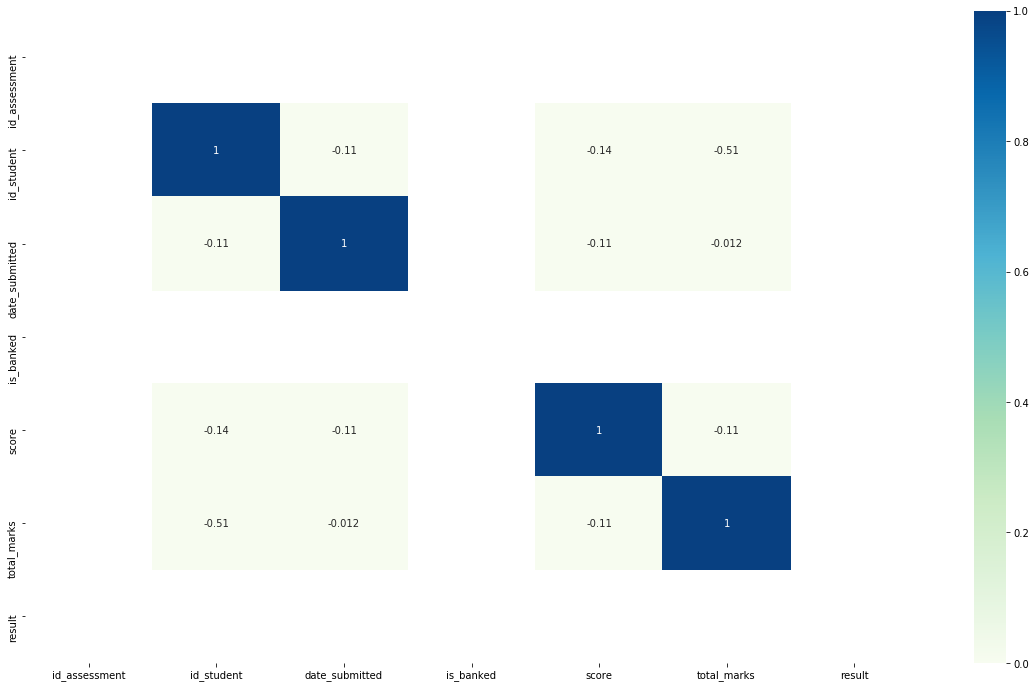

In [46]:
#try to find correlation between final_result and remaining variables
plt.figure(figsize=(20,12))
sns.heatmap(student_assessments_all.corr(), annot = True, vmin = 0, cmap = 'GnBu')
plt.show()

In [47]:
assessments[(assessments['code_module'] == 'GGG') & (assessments['code_presentation'] =='2014J')]

,code_module,code_presentation,id_assessment,assessment_type,date,weight
196,GGG,2014J,37438,CMA,229.0,0.0
197,GGG,2014J,37439,CMA,229.0,0.0
198,GGG,2014J,37440,CMA,229.0,0.0
199,GGG,2014J,37441,CMA,229.0,0.0
200,GGG,2014J,37442,CMA,229.0,0.0
201,GGG,2014J,37443,CMA,229.0,0.0
202,GGG,2014J,37435,TMA,61.0,0.0
203,GGG,2014J,37436,TMA,124.0,0.0
204,GGG,2014J,37437,TMA,173.0,0.0
205,GGG,2014J,37444,Exam,229.0,100.0


In [48]:
courses.groupby(['code_module','code_presentation'])['module_presentation_length'].size()

code_module  code_presentation
AAA          2013J                1
             2014J                1
BBB          2013B                1
             2013J                1
             2014B                1
             2014J                1
CCC          2014B                1
             2014J                1
DDD          2013B                1
             2013J                1
             2014B                1
             2014J                1
EEE          2013J                1
             2014B                1
             2014J                1
FFF          2013B                1
             2013J                1
             2014B                1
             2014J                1
GGG          2013J                1
             2014B                1
             2014J                1
Name: module_presentation_length, dtype: int64

In [49]:
student_info['age_band'].unique()

array(['55<=', '35-55', '0-35'], dtype=object)